In [1]:
import matplotlib.pyplot as plt
import emcee
import corner
import numpy as np
import scipy
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pandas as pd

from matplotlib import rcParams

rcParams.update({'font.size': 12,'font.family':'serif'})
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 200
rcParams["axes.labelsize"] = 12 #22 sizes for corner plot
rcParams["xtick.labelsize"] = 12 #16
rcParams["ytick.labelsize"] = 12 #16
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
reader = emcee.backends.HDFBackend("scalar_dm_saturated_heavy_result_add.h5", read_only=True) 
reader_l = emcee.backends.HDFBackend("scalar_dm_underabundant_heavy_result_add.h5", read_only=True)

In [3]:
lreader = emcee.backends.HDFBackend("scalar_dm_saturated_light_result_add.h5", read_only=True) 
lreader_l = emcee.backends.HDFBackend("scalar_dm_underabundant_light_result.h5", read_only=True)

In [4]:
tau = [2211.75690747,1940.07974251,2267.58648951,2168.3324042,1613.50019259,1940.42466355,2162.91652408]
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

tau_l = [1284.80793459,1795.80169532,1890.48038957,1416.98795302,1071.07764876,1340.50416464,1939.75117875]
burnin_l = int(2 * np.max(tau_l))
thin_l = int(0.5 * np.min(tau_l))

In [5]:
ltau = [1692.19416655,1649.1566229,1068.58516871,1876.42238476,1043.71018266,1362.77274056]
lburnin = int(2 * np.max(ltau))
lthin = int(0.5 * np.min(ltau))

ltau_l = np.array([217.79188193, 220.08402724, 214.35268584, 216.6901225 ,217.59237585, 225.86798567])
lburnin_l = int(2 * np.max(ltau_l))
lthin_l = int(0.5 * np.min(ltau_l))

In [6]:
samples_u = reader.get_chain(discard=burnin,flat=True,thin=thin)
log_likelihood_samples_u = reader.get_blobs(discard=burnin, flat=True, thin=thin)

samples_ul = reader_l.get_chain(discard=burnin_l,flat=True,thin=thin_l)
log_likelihood_samples_ul = reader_l.get_blobs(discard=burnin_l, flat=True, thin=thin_l)

In [7]:
samples_sat_light = lreader.get_chain(discard=lburnin,flat=True,thin=lthin)
log_likelihood_samples_sat_light = lreader.get_blobs(discard=lburnin, flat=True, thin=lthin)

samples_und_light = lreader_l.get_chain(discard=lburnin_l,flat=True,thin=lthin_l)
log_likelihood_samples_und_light = lreader_l.get_blobs(discard=lburnin_l, flat=True, thin=lthin_l)

In [8]:
ln_like_totalu, lnlike_rau, lnlike_uu, lnlike_svu, lnlike_neffu, lnlike_deltam13u = log_likelihood_samples_u[:,0],log_likelihood_samples_u[:,1],log_likelihood_samples_u[:,2],log_likelihood_samples_u[:,3],log_likelihood_samples_u[:,4],log_likelihood_samples_u[:,5]
ln_like_totalul, lnlike_raul, lnlike_uul, lnlike_svul, lnlike_nefful, lnlike_deltam13ul = log_likelihood_samples_ul[:,0],log_likelihood_samples_ul[:,1],log_likelihood_samples_ul[:,2],log_likelihood_samples_ul[:,3],log_likelihood_samples_ul[:,4],log_likelihood_samples_ul[:,5]
lnlike_Zu, lnlike_Ku = log_likelihood_samples_u[:,6], log_likelihood_samples_u[:,7]
lnlike_Zul, lnlike_Kul = log_likelihood_samples_ul[:,6], log_likelihood_samples_ul[:,7]
mxu, mphi1u, del_mphiu, mnu, lamphiu, ynuu, m1u = samples_u[:,0], samples_u[:,1], samples_u[:,2], samples_u[:,3], samples_u[:,4], samples_u[:,5],samples_u[:,6]
mxul, mphi1ul, del_mphiul, mnul, lamphiul, ynuul, m1ul = samples_ul[:,0], samples_ul[:,1], samples_ul[:,2], samples_ul[:,3], samples_ul[:,4], samples_ul[:,5],samples_ul[:,6]
ra_sampleu, cs_sampleu, sc_sampleu, mnu3_sampleu, Z_decay_sampleu, K_decay_sampleu = log_likelihood_samples_u[:,8], log_likelihood_samples_u[:,9],log_likelihood_samples_u[:,10],log_likelihood_samples_u[:,11],log_likelihood_samples_u[:,12], log_likelihood_samples_u[:,13]
ra_sampleul, cs_sampleul, sc_sampleul, mnu3_sampleul, Z_decay_sampleul, K_decay_sampleul = log_likelihood_samples_ul[:,8], log_likelihood_samples_ul[:,9],log_likelihood_samples_ul[:,10],log_likelihood_samples_ul[:,11],log_likelihood_samples_ul[:,12], log_likelihood_samples_ul[:,13]

In [9]:
ln_like_totalu_light, lnlike_rau_light, lnlike_uu_light, lnlike_svu_light, lnlike_neffu_light, lnlike_nuu_light = [element for element in log_likelihood_samples_sat_light[:,0:6].T]
ln_like_totalul_light, lnlike_raul_light, lnlike_uul_light, lnlike_svul_light, lnlike_nefful_light, lnlike_nuul_light = [element for element in log_likelihood_samples_und_light[:,0:6].T]
lnlike_Zu_light, lnlike_Ku_light = log_likelihood_samples_sat_light[:,6],log_likelihood_samples_sat_light[:,7]
lnlike_Zul_light, lnlike_Kul_light = log_likelihood_samples_und_light[:,6],log_likelihood_samples_und_light[:,7]
mxu_light, mphi1u_light, del_mphiu_light, mnu_light, lamphiu_light, ynuu_light = [element for element in samples_sat_light[:,0:6].T]
mxul_light, mphi1ul_light, del_mphiul_light, mnul_light, lamphiul_light, ynuul_light = [element for element in samples_und_light[:,0:6].T]
ra_sampleu_light, cs_sampleu_light, sc_sampleu_light, mnu1_sampleu_light, Z_decay_sampleu_light, K_decay_sampleu_light = [element for element in log_likelihood_samples_sat_light[:,8:14].T]
ra_sampleul_light, cs_sampleul_light, sc_sampleul_light, mnu1_sampleul_light, Z_decay_sampleul_light, K_decay_sampleul_light = [element for element in log_likelihood_samples_und_light[:,8:14].T]

In [10]:
import pandas as pd

In [11]:
d_sat_l = {'dm_mass': mxu_light, 'mphi':mphi1u_light,'mn':mnu_light,'delmphi':del_mphiu_light,'lamphi':lamphiu_light,'ynu':ynuu_light,'mnu1':mnu1_sampleu_light,
         'ra':ra_sampleu_light, 'sv':cs_sampleu_light, 'sc':sc_sampleu_light, 'Z_decay':Z_decay_sampleu_light, 
         'K_decay':K_decay_sampleu_light,'total_like':ln_like_totalu_light,'nu_like':lnlike_nuu_light, 'ra_like':lnlike_rau_light}


df_sat_l = pd.DataFrame(data=d_sat_l)

In [12]:
d_sat = {'dm_mass': mxu, 'mphi':mphi1u,'mn':mnu,'delmphi':del_mphiu,'lamphi':lamphiu,'ynu':ynuu,'mnu1':m1u,
         'ra':ra_sampleu, 'sv':cs_sampleu, 'sc':sc_sampleu, 'mnu3':mnu3_sampleu, 'Z_decay':Z_decay_sampleu, 
         'K_decay':K_decay_sampleu,'total_like':ln_like_totalu}

df_sat= pd.DataFrame(data=d_sat)

In [13]:
mask_sat = (df_sat['ra'] >= 0.11) & (df_sat['ra'] <= 0.13)
df_sat_masked = df_sat[mask_sat]

df_sat_masked

,dm_mass,mphi,mn,delmphi,lamphi,ynu,mnu1,ra,sv,sc,mnu3,Z_decay,K_decay,total_like
0,-0.875898,1.293725,2.242955,-8.840831,0.370600,-0.068023,0.007436,0.118091,4.318136e-26,1.089275e-58,0.051247,0.000000,0.0,-2.416148
1,-0.601696,1.695255,3.782546,-9.160240,0.867248,0.257927,0.003263,0.119892,4.391588e-26,1.666722e-59,0.050158,0.000000,0.0,-0.178207
2,-1.274828,-1.136184,1.043377,-4.251138,0.065804,-0.742141,0.006584,0.120703,4.007351e-26,1.439559e-57,0.050872,0.000118,0.0,-0.406894
3,-0.045806,0.398624,1.461869,-6.974497,0.432506,-0.525684,0.008964,0.119502,4.207941e-26,3.290659e-61,0.051181,0.000092,0.0,-0.213122
4,-1.644126,-1.050042,-0.160062,-3.883144,0.606572,-1.384349,0.014202,0.118414,3.922142e-26,1.948049e-56,0.052205,0.000020,0.0,-0.873817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,-1.161421,2.304362,3.597777,-10.890633,0.330651,0.544133,0.008220,0.120800,4.061783e-26,7.364321e-58,0.051028,0.000000,0.0,-0.301741
43996,-1.362032,1.048240,1.759789,-9.370436,-0.674338,0.275974,0.015474,0.119571,4.004685e-26,2.902780e-57,0.052200,0.000121,0.0,-0.836118
43997,-0.223139,0.994324,2.161844,-7.863505,0.734934,-0.344348,0.015417,0.121147,4.281887e-26,1.187816e-60,0.052699,0.000000,0.0,-0.586819
43998,-1.106475,0.826741,2.492859,-8.686700,-0.407975,0.299877,0.004783,0.119063,4.154089e-26,5.152795e-58,0.050118,0.000000,0.0,-0.936619


In [14]:
mask_sat_l = (df_sat_l['ra'] >= 0.11) & (df_sat_l['ra'] <= 0.13) & (df_sat_l['mnu1'] >= 0)
df_sat_masked_l = df_sat_l[mask_sat_l]

df_sat_masked_l

,dm_mass,mphi,mn,delmphi,lamphi,ynu,mnu1,ra,sv,sc,Z_decay,K_decay,total_like,nu_like,ra_like
0,-0.388841,0.173843,2.077963,-11.453933,-0.015375,-0.132972,1.745584e-15,0.121376,4.358079e-26,3.751902e-60,0.000000,0.0,-0.656954,-4.451516e-09,-0.656954
1,0.248445,1.134606,4.220819,-15.611586,0.538110,0.537924,3.186170e-18,0.120007,3.982365e-26,4.248305e-62,0.000000,0.0,-0.000019,-1.483079e-14,-0.000019
2,-1.841240,0.810871,3.358065,-9.788081,0.612722,0.109497,3.363475e-13,0.120191,3.799117e-26,7.543204e-56,0.000000,0.0,-1.018631,-1.652734e-04,-0.012676
3,1.530073,1.775070,2.619638,-14.224792,0.445076,0.018093,1.074207e-15,0.118330,2.080922e-26,2.766759e-66,0.000000,0.0,-0.968922,-1.685785e-09,-0.968922
4,-1.383469,-0.492335,-0.292015,-6.544069,-0.175889,-0.772712,9.220146e-12,0.117998,4.051218e-26,3.370703e-57,0.000320,0.0,-1.554708,-1.241944e-01,-1.391841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,1.313740,1.771116,2.722614,-15.545365,0.140500,0.203929,1.483481e-16,0.119521,2.113372e-26,1.376972e-65,0.000000,0.0,-0.079585,-3.215072e-11,-0.079585
68996,-0.901182,-0.403468,1.543905,-5.389110,0.790375,-0.812453,2.178654e-11,0.120432,4.215095e-26,1.244237e-58,0.000017,0.0,-0.758390,-6.934304e-01,-0.064847
68997,-0.718377,1.472365,3.276840,-10.568599,0.054716,0.445316,4.525271e-12,0.120053,4.329584e-26,3.678983e-59,0.000000,0.0,-0.030903,-2.991684e-02,-0.000986
68998,-0.734881,0.164817,2.507005,-7.700570,0.667964,-0.311567,1.954956e-12,0.121776,4.255998e-26,4.044405e-59,0.000000,0.0,-1.100320,-5.583420e-03,-1.094736


In [15]:
# Convert each column to a numpy array and assign to appropriately named variables
dm_mass_sat = df_sat_masked['dm_mass'].to_numpy()
mphi_sat = df_sat_masked['mphi'].to_numpy()
mn_sat = df_sat_masked['mn'].to_numpy()
delmphi_sat = df_sat_masked['delmphi'].to_numpy()
lamphi_sat = df_sat_masked['lamphi'].to_numpy()
ynu_sat = df_sat_masked['ynu'].to_numpy()
mnu1_sat = df_sat_masked['mnu1'].to_numpy()
ra_sat = df_sat_masked['ra'].to_numpy()
sv_sat = df_sat_masked['sv'].to_numpy()
sc_sat = df_sat_masked['sc'].to_numpy()
mnu3_sat = df_sat_masked['mnu3'].to_numpy()
Z_decay_sat = df_sat_masked['Z_decay'].to_numpy()
K_decay_sat = df_sat_masked['K_decay'].to_numpy()
total_like_sat = df_sat_masked['total_like'].to_numpy()

In [16]:
# Convert each column to a numpy array and assign to appropriately named variables
dm_mass_sat_l = df_sat_masked_l['dm_mass'].to_numpy()
mphi_sat_l = df_sat_masked_l['mphi'].to_numpy()
mn_sat_l = df_sat_masked_l['mn'].to_numpy()
delmphi_sat_l = df_sat_masked_l['delmphi'].to_numpy()
lamphi_sat_l = df_sat_masked_l['lamphi'].to_numpy()
ynu_sat_l = df_sat_masked_l['ynu'].to_numpy()
mnu1_sat_l = df_sat_masked_l['mnu1'].to_numpy()
ra_sat_l = df_sat_masked_l['ra'].to_numpy()
sv_sat_l = df_sat_masked_l['sv'].to_numpy()
sc_sat_l = df_sat_masked_l['sc'].to_numpy()
Z_decay_sat_l = df_sat_masked_l['Z_decay'].to_numpy()
K_decay_sat_l = df_sat_masked_l['K_decay'].to_numpy()
nu_like_sat_l = df_sat_masked_l['nu_like'].to_numpy()
total_like_sat_l = df_sat_masked_l['total_like'].to_numpy()
total_nu_like_sat_l = df_sat_masked_l['nu_like'].to_numpy()
total_ra_like_sat_l = df_sat_masked_l['ra_like'].to_numpy()

**Underabundant**

In [17]:
#now for the underabundant sample

d_und_l = {'dm_mass': mxul_light, 'mphi':mphi1ul_light,'mn':mnul_light,'delmphi':del_mphiul_light,'lamphi':lamphiul_light,'ynu':ynuul_light,'mnu1':mnu1_sampleul_light,
         'ra':ra_sampleul_light, 'sv':cs_sampleul_light, 'sc':sc_sampleul_light, 'Z_decay':Z_decay_sampleul_light, 
         'K_decay':K_decay_sampleul_light,'total_like':ln_like_totalul_light,'nu_like':lnlike_nuul_light}

df_und_l = pd.DataFrame(data=d_und_l)

In [18]:
#now for the underabundant heavy sample

d_und = {'dm_mass': mxul, 'mphi':mphi1ul,'mn':mnul,'delmphi':del_mphiul,'lamphi':lamphiul,'ynu':ynuul,'mnu1':m1ul,
         'ra':ra_sampleul, 'sv':cs_sampleul, 'sc':sc_sampleul,'mnu3':mnu3_sampleul, 'Z_decay':Z_decay_sampleul, 
         'K_decay':K_decay_sampleul,'total_like':ln_like_totalul}

df_und = pd.DataFrame(data=d_und)

In [19]:
mask_und = (df_und['ra'] > 0) & (df_und['mnu3'] >= 0) & (df_und['ra'] <= 1000)
df_und_masked = df_und[mask_und]

df_und_masked

,dm_mass,mphi,mn,delmphi,lamphi,ynu,mnu1,ra,sv,sc,mnu3,Z_decay,K_decay,total_like
0,-1.234223,0.084060,0.841862,-7.088859,-0.280588,-0.384462,0.000104,0.110594,4.421140e-26,1.324182e-57,0.049937,0.000794,0.0,-0.710176
1,-1.397705,0.940132,1.811918,-8.614170,0.008608,0.007255,0.029761,0.051684,9.746830e-26,9.039177e-57,0.058604,0.000014,0.0,-0.323081
2,-0.390966,1.173892,1.637685,-9.723722,-0.083882,0.360627,0.012966,0.006458,9.675725e-25,8.561851e-59,0.052085,0.000677,0.0,-0.404595
3,-0.065765,0.937981,1.370064,-8.901471,0.305381,0.087996,0.028891,0.004282,1.428631e-24,1.330747e-59,0.057735,0.001538,0.0,-1.218340
4,-1.253350,-0.451553,0.529382,-5.746045,0.038447,-0.738919,0.002218,0.087757,5.642300e-26,1.914256e-57,0.050386,0.000230,0.0,-0.069008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66995,0.581058,1.192892,2.154823,-9.335253,0.769760,0.227018,0.005004,0.000803,6.493945e-24,6.830563e-61,0.049948,0.000000,0.0,-1.535727
66996,-1.403957,-0.541689,1.495751,-5.311754,0.845947,-0.544798,0.024370,0.006535,8.721307e-25,8.419712e-56,0.055535,0.000077,0.0,-0.588277
66997,0.534745,0.578523,3.108856,-7.659261,1.020220,0.241872,0.001593,0.001710,3.084372e-24,3.856622e-61,0.050317,0.000000,0.0,-0.012319
66998,-0.393331,2.067529,3.442412,-10.579693,1.012444,0.533834,0.010420,0.003217,2.012058e-24,1.810446e-58,0.051375,0.000000,0.0,-0.021512


In [20]:
mask_und_l = (df_und_l['ra'] > 0) & (df_und_l['ra'] <= 0.13) & (df_und_l['mnu1'] >= 0)
df_und_masked_l = df_und_l[mask_und_l]

df_und_masked_l

,dm_mass,mphi,mn,delmphi,lamphi,ynu,mnu1,ra,sv,sc,Z_decay,K_decay,total_like,nu_like
0,-1.113539,0.041809,3.452826,-7.458494,0.659049,0.537321,1.644684e-11,0.002115,2.938954e-24,3.826219e-56,0.000000,0.0,-3.951767e-01,-3.951767e-01
1,-0.590961,0.713188,2.874525,-8.352078,0.083312,0.226012,2.543341e-11,0.085803,6.265870e-26,2.207293e-59,0.000000,0.0,-9.450083e-01,-9.450083e-01
2,-1.770178,1.351946,1.868720,-12.172508,0.325809,0.213904,1.394394e-13,0.007858,7.010177e-25,8.519551e-55,0.000000,0.0,-1.094754e+00,-2.840517e-05
3,-1.411249,0.144495,1.642731,-9.657891,-0.321195,0.223289,1.019297e-12,0.004818,1.202465e-24,1.224329e-55,0.000994,0.0,-3.753238e-01,-1.517847e-03
4,-1.029038,-0.614445,2.307043,-9.176452,-0.240188,0.527761,1.737905e-13,0.001062,6.104497e-24,4.361245e-56,0.000000,0.0,-4.412437e-05,-4.412437e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,-1.827566,-0.222820,0.687647,-10.358000,0.980953,-0.675758,3.007634e-15,0.001921,3.116845e-24,5.629526e-54,0.000259,0.0,-1.057100e+00,-1.321528e-08
181996,-1.115336,-0.388748,2.357464,-10.461151,-0.179231,0.515025,2.003210e-14,0.001294,4.920915e-24,6.462975e-56,0.000000,0.0,-5.862457e-07,-5.862457e-07
181997,-0.571119,-0.450640,3.395830,-8.797191,0.047840,0.514591,9.110308e-14,0.022782,2.548214e-25,7.365203e-59,0.000000,0.0,-1.212530e-05,-1.212530e-05
181998,-1.063958,-0.940397,2.471717,-8.349371,0.956992,0.148451,3.667022e-14,0.000220,3.165527e-23,2.734972e-55,0.000000,0.0,-1.964507e-06,-1.964507e-06


In [21]:
# Convert each column to a numpy array and assign to appropriately named variables
dm_mass_und = df_und_masked['dm_mass'].to_numpy()
mphi_und = df_und_masked['mphi'].to_numpy()
mn_und = df_und_masked['mn'].to_numpy()
delmphi_und = df_und_masked['delmphi'].to_numpy()
lamphi_und = df_und_masked['lamphi'].to_numpy()
ynu_und = df_und_masked['ynu'].to_numpy()
mnu1_und = df_und_masked['mnu1'].to_numpy()
ra_und = df_und_masked['ra'].to_numpy()
sv_und = df_und_masked['sv'].to_numpy()
sc_und = df_und_masked['sc'].to_numpy()
mnu3_und = df_und_masked['mnu3'].to_numpy()
Z_decay_und = df_und_masked['Z_decay'].to_numpy()
K_decay_und = df_und_masked['K_decay'].to_numpy()
total_like_und = df_und_masked['total_like'].to_numpy()

In [22]:
# Convert each column to a numpy array and assign to appropriately named variables
dm_mass_und_l = df_und_masked_l['dm_mass'].to_numpy()
mphi_und_l = df_und_masked_l['mphi'].to_numpy()
mn_und_l = df_und_masked_l['mn'].to_numpy()
delmphi_und_l = df_und_masked_l['delmphi'].to_numpy()
lamphi_und_l = df_und_masked_l['lamphi'].to_numpy()
ynu_und_l = df_und_masked_l['ynu'].to_numpy()
mnu1_und_l = df_und_masked_l['mnu1'].to_numpy()
ra_und_l = df_und_masked_l['ra'].to_numpy()
sv_und_l = df_und_masked_l['sv'].to_numpy()
sc_und_l = df_und_masked_l['sc'].to_numpy()
Z_decay_und_l = df_und_masked_l['Z_decay'].to_numpy()
K_decay_und_l = df_und_masked_l['K_decay'].to_numpy()
nu_like_und_l = df_und_masked_l['nu_like'].to_numpy()
total_like_und_l = df_und_masked_l['total_like'].to_numpy()

**Let's compare the profile likelihood ratios and the posteriors**

In [23]:
from matplotlib.patches import Polygon

In [24]:
all_labels = [r'log$_{10} (m_\eta$/GeV)',r'log$_{10} (m_{\phi_1}$/GeV)',r'log$_{10}(\delta m_\phi)$', r'log$_{10} (m_N$/GeV)',r'log$_{10} (\lambda$)',r'log$_{10} (Y_\nu$)',r'log$_{10} (\lambda Y_\nu^2$)',r'$\Omega_\eta h^2$',r'$\langle \sigma v \rangle$',r'$\sigma/m_\eta$',r'$m_\nu/m_{\nu_0}$']

In [33]:
extent4=[-3.999960875519105,
 4.43236035341847,
 -15.999998020903904,
 -1.5129063179729778]

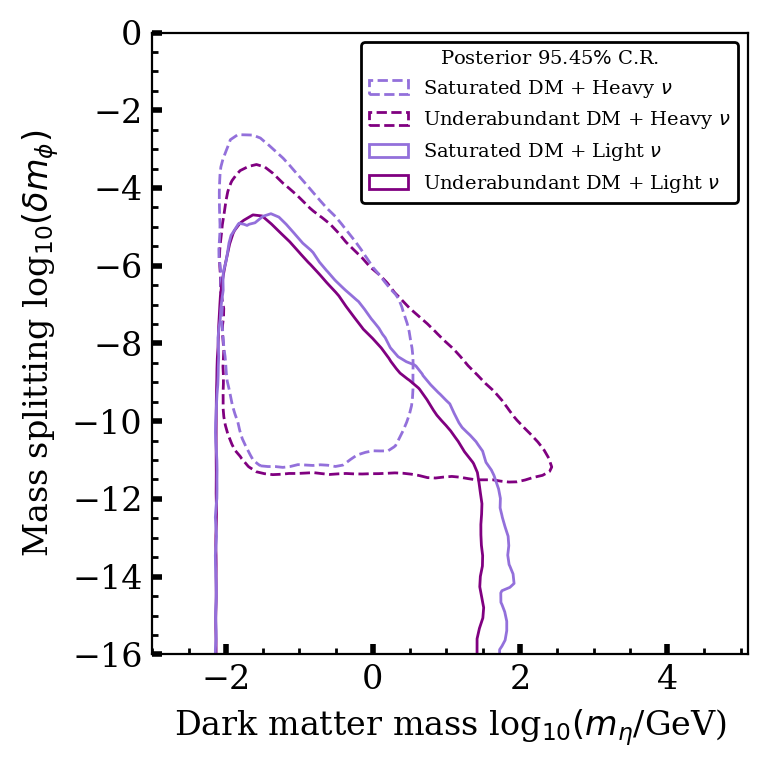

In [34]:
fig, ax = plt.subplots(figsize=(4,4))

corner.hist2d(dm_mass_und, delmphi_und, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['purple'],'linestyles':'--'}, bins=50, smooth=True)

corner.hist2d(dm_mass_sat, delmphi_sat, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','none','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['mediumpurple'],'linestyles':'--'}, bins=50, smooth=True)

corner.hist2d(dm_mass_und_l, delmphi_und_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['purple']}, bins=50, smooth=True)

corner.hist2d(dm_mass_sat_l, delmphi_sat_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','none','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['mediumpurple']}, bins=55, smooth=True)


fmt_labels=[r'Underabundant DM + Light $\nu$',r'Saturated DM + Light $\nu$',r'Underabundant DM + Heavy $\nu$',r'Saturated DM + Heavy $\nu$']
manual=[[2,0]] #label position

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Dark matter mass '+all_labels[0])
ax.set_ylabel(r'Mass splitting '+all_labels[2])
ax.set_facecolor('white')

pink_line = mpatches.Patch(edgecolor='mediumpurple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[3],ls='--')
deeppink_line = mpatches.Patch(edgecolor='purple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[2],ls='--')
blue_line = mpatches.Patch(edgecolor='mediumpurple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])
darkblue_line = mpatches.Patch(edgecolor='purple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0])

legend=plt.legend(handles=[pink_line,deeppink_line,blue_line,darkblue_line],frameon=True, fontsize=7, loc='upper right', 
                  framealpha=1, edgecolor='black',title=r'Posterior 95.45$\%$ C.R.', title_fontsize=7)

plt.xlim(-3,5.1)
plt.ylim(-16,0)
plt.tight_layout()
            
#plt.savefig('meta_delmphi_pos_all.pdf')

plt.show()  

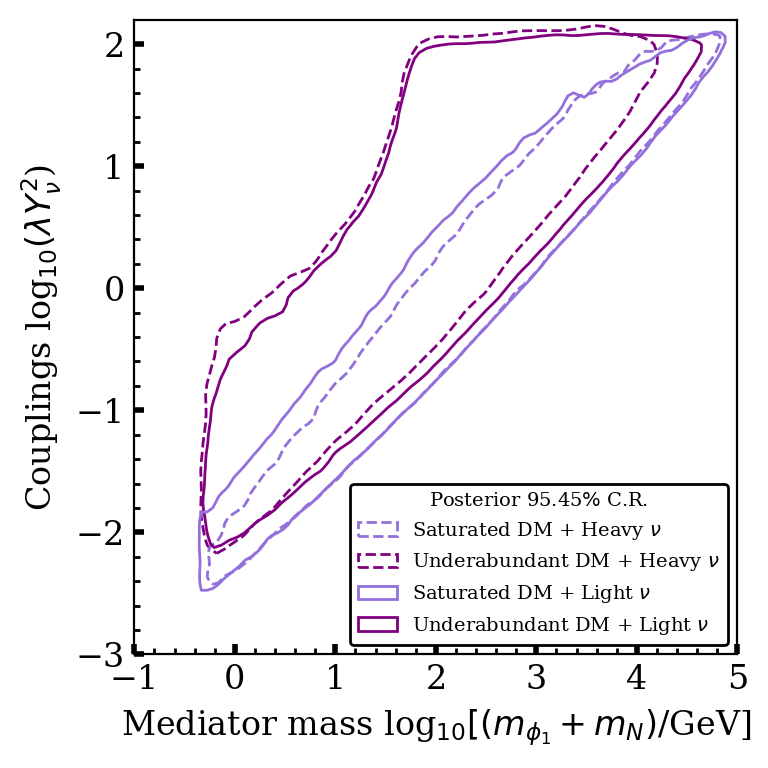

In [35]:
fig, ax = plt.subplots(figsize=(4,4))

corner.hist2d(np.log10(10**mn_und+10**mphi_und),lamphi_und+2*ynu_und, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['purple'],'linestyles':'--'}, bins=70, smooth=True)

corner.hist2d(np.log10(10**mn_sat+10**mphi_sat),lamphi_sat+2*ynu_sat, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','none','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['mediumpurple'],'linestyles':'--'}, bins=100, smooth=True)

corner.hist2d(np.log10(10**mn_und_l+10**mphi_und_l),lamphi_und_l+2*ynu_und_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['purple']}, bins=100, smooth=True)

corner.hist2d(np.log10(10**mn_sat_l+10**mphi_sat_l),lamphi_sat_l+2*ynu_sat_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','none','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['mediumpurple']}, bins=100, smooth=True)


fmt_labels=[r'Underabundant DM + Light $\nu$',r'Saturated DM + Light $\nu$',r'Underabundant DM + Heavy $\nu$',r'Saturated DM + Heavy $\nu$']
manual=[[2,0]] #label position

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.set_facecolor('white')

pink_line = mpatches.Patch(edgecolor='mediumpurple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[3],ls='--')
deeppink_line = mpatches.Patch(edgecolor='purple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[2],ls='--')
blue_line = mpatches.Patch(edgecolor='mediumpurple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])
darkblue_line = mpatches.Patch(edgecolor='purple', facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0])

legend=plt.legend(handles=[pink_line,deeppink_line,blue_line,darkblue_line],frameon=True, fontsize=7, loc='lower right', 
                  framealpha=1, edgecolor='black',title=r'Posterior 95.45$\%$ C.R.', title_fontsize=7)

plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)
plt.tight_layout()
            
#plt.savefig('couplings_mediators_pos_all.pdf')

plt.show()  

In [25]:
bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(np.log10(10**mphi_sat_l+10**mn_sat_l),lamphi_sat_l+2*ynu_sat_l,total_like_sat_l,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_sat_l))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(np.log10(10**mphi_sat_l+10**mn_sat_l)),np.max(np.log10(10**mphi_sat_l+10**mn_sat_l)),np.min(lamphi_sat_l+2*ynu_sat_l),np.max(lamphi_sat_l+2*ynu_sat_l)]
            
x = np.linspace(extent[0],extent[1],200) #50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated_couplings = interpolator_bi(xnew,ynew)

# you could also save the PLR as text files and then import them for plotting
# np.savetxt('PLR_masses_couplings_saturated_light', PLR_interpolated_couplings)

In [26]:
contour_values = [95.45,68.27]
contour_levels = [np.exp(-scipy.special.gammaincinv(1,0.01*x)) for x in contour_values]
contour_levels

[0.0455, 0.31730000000000014]

In [27]:
mk=0.493677  #kaon mass in GeV
couplings_limit = np.log10(4*np.pi*4*np.pi)

/tmp/ipykernel_190977/3962193442.py:45: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cst.collections:


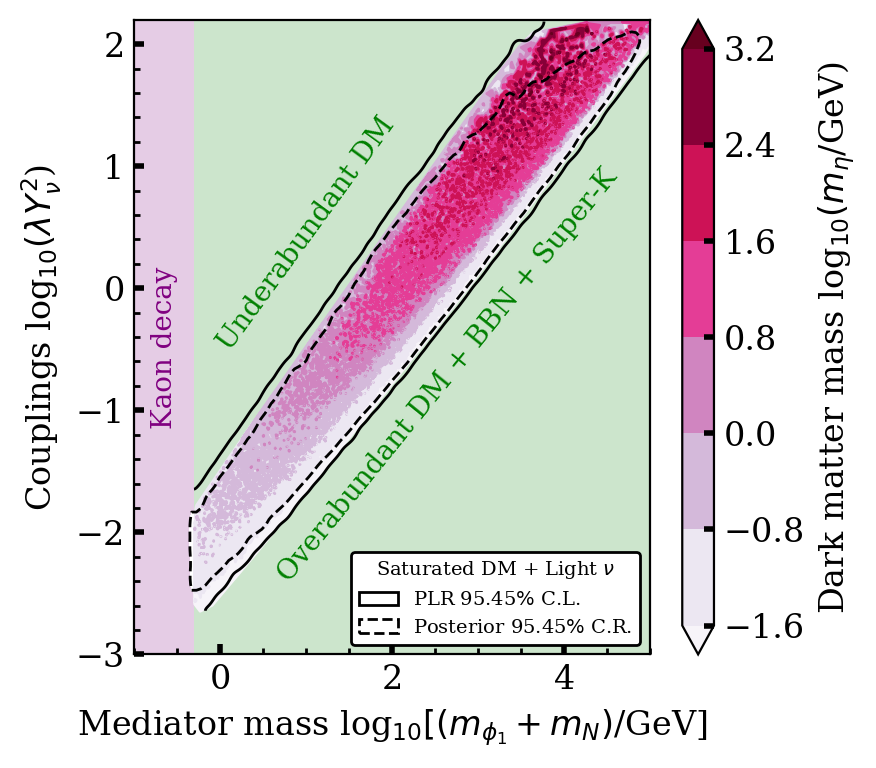

In [32]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([np.log10(mk),5],-4,3,color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
#ax.fill_between([np.log10(mk),np.log10(60)],-1,couplings_limit,color='teal',alpha=0.2, linewidth=0)
corner.hist2d(np.log10(10**mn_sat_l+10**mphi_sat_l),lamphi_sat_l+2*ynu_sat_l,ax=ax,levels=[0.9545],color='pink',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=100, smooth=True) 

#con1 = ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated_couplings5,20), extent=extent, levels=[contour_levels[0],1], colors='white',alpha=1)

CSu = ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated_couplings,20), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

cst=ax.tricontourf(np.log10(10**mn_sat_l+10**mphi_sat_l),lamphi_sat_l+2*ynu_sat_l,dm_mass_sat_l,
                cmap='PuRd',extend='both')#,norm=matplotlib.colors.LogNorm())
plt.colorbar(cst).set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')

ax.annotate(r'Underabundant DM' ,(1,-0.5),ha='center', rotation=54, fontsize=10, color='green')
ax.annotate(r'Overabundant DM + BBN + Super-K' ,(2.65,-2.4),ha='center', rotation=51, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
#ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#ax.set_facecolor('white')
 
fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])
#mlines.Line2D([], [], color='black', marker='_',
                          #markersize=15, label=fmt_labels[0])

legend=plt.legend(handles=[black_line,blue_line],frameon=True, fontsize=7, loc='lower right', 
                  framealpha=1, edgecolor='black', title=r'Saturated DM + Light $\nu$',title_fontsize=7)

for c in cst.collections:
    c.set_edgecolor("face")
    
plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)
plt.tight_layout()

#plt.savefig('masses_couplings_pos_vs_plr_light_saturated_dm_mass_tricontour.pdf')

plt.show()

In [36]:
xp = dm_mass_und
yp = delmphi_und

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_und,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_und))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200) #50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

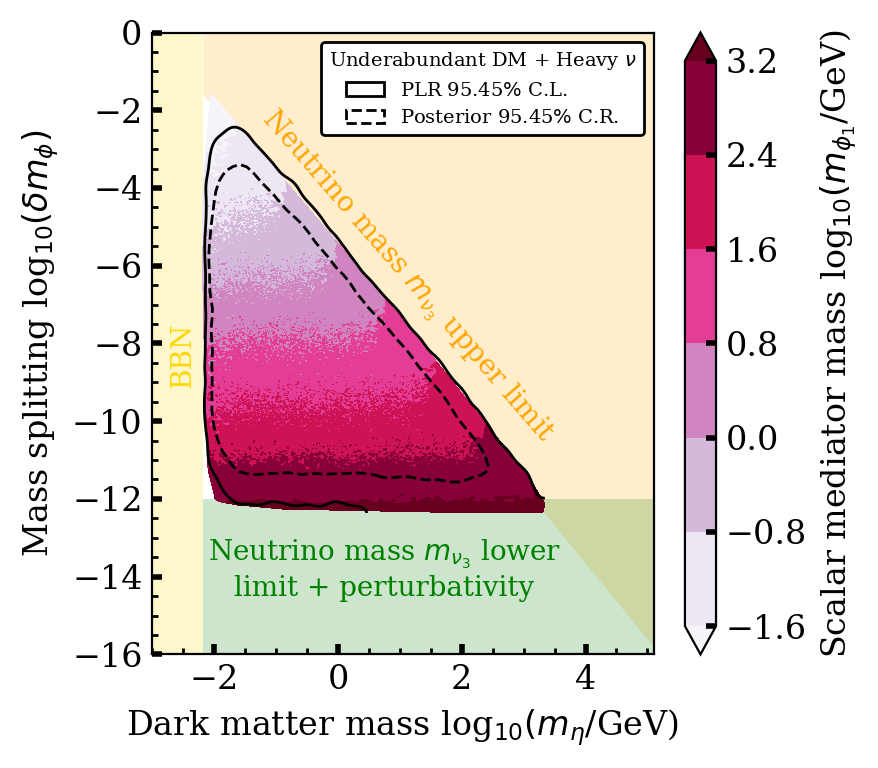

In [39]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([-2.18,5.2],0,[-1.6,-16],color='orange',alpha=0.2, lw=0)
# ax.fill_between([-2.18,5.1],0,[-1.9,-16],color='red',alpha=0.2, lw=0)
ax.fill_between([-2.18,5.3],-16,-12,color='green',alpha=0.2, lw=0)
ax.fill_between([-3.5,-2.18],-16,2,color='gold',alpha=0.2, lw=0)

corner.hist2d(dm_mass_und, delmphi_und, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['black'], 'linestyles':'--'}, bins=50, smooth=True)

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,40), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

plt.tricontourf(dm_mass_und, delmphi_und, mphi_und, cmap='PuRd',extend='both')
plt.colorbar().set_label(r'Scalar mediator mass log$_{10}(m_{\phi_1}$/GeV)')


fmt_labels=[r'Posterior 95.45$\%$ C.R.',r'Saturated + Light',r'Underabundant + Heavy',r'Saturated + Heavy']
manual=[[2,0]] #label position

ax.annotate(r'Neutrino mass $m_{\nu_3}$ lower'+'\n'+ 'limit + perturbativity',(0.75,-14.5),ha='center', rotation=0, fontsize=10, color='green')
ax.annotate(r'BBN',(-2.5,-9),ha='center', rotation=90, fontsize=10, color='gold')
ax.annotate(r'Neutrino mass $m_{\nu_3}$ upper limit',(1.1,-10.5),ha='center', rotation=-49, fontsize=10, color='orange')


ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Dark matter mass '+all_labels[0])
ax.set_ylabel(r'Mass splitting '+all_labels[2])
ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='upper right', 
                  framealpha=1, edgecolor='black',title=r'Underabundant DM + Heavy $\nu$', title_fontsize=7)

# plt.ylim(-16,extent4[3])
plt.xlim(-3,5.1)#extent4[1])
plt.ylim(-16,0)
plt.tight_layout()
            
#plt.savefig('dm_mass_delmphi_pos_vs_plr_heavy_underabundant_mass_splitting_tricontour.pdf')
plt.show()  

In [40]:
xp = dm_mass_sat
yp = delmphi_sat

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_sat,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_sat))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

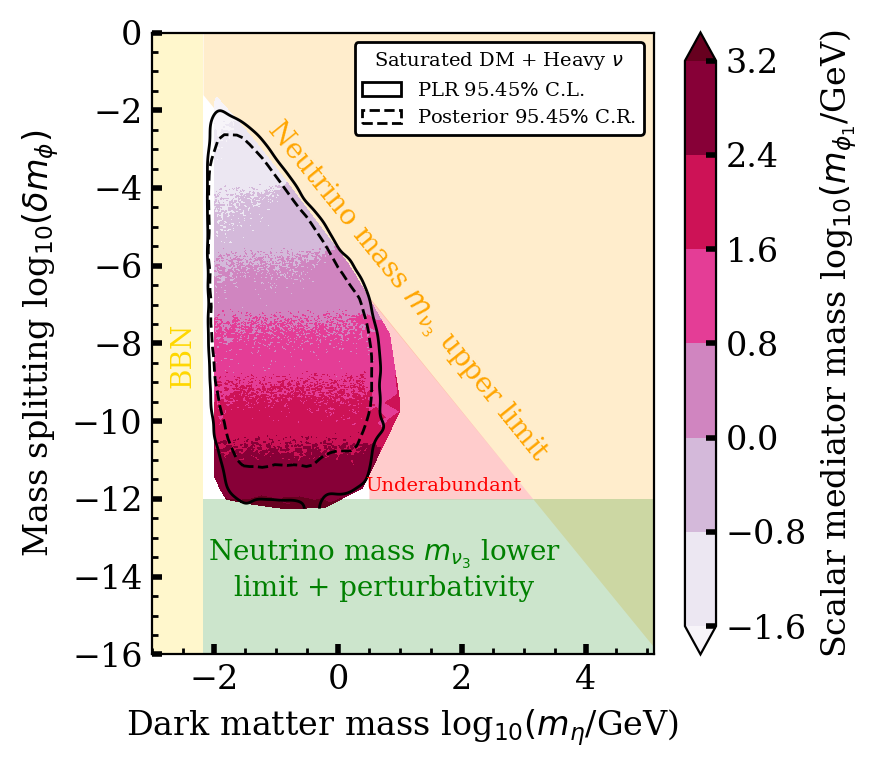

In [41]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([-2.18,5.2],0,[-1.6,-16],color='orange',alpha=0.2, lw=0)
#ax.fill_between([-2.18,1], -16, 2, color='red', alpha=0.2, lw=0)  # Red on the left of orange
ax.fill_between([0.5,3.15], [-12,-12], [-6.8,-12], color='red', alpha=0.2, lw=0)  # Red below the orange slope
ax.fill_between([-2.18,5.3],-16,-12,color='green',alpha=0.2, lw=0)
ax.fill_between([-3.5,-2.18],-16,2,color='gold',alpha=0.2, lw=0)

corner.hist2d(dm_mass_sat, delmphi_sat, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['black'], 'linestyles':'--'}, bins=50, smooth=True)

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,40), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

# **Refine triangulation** by masking invalid regions
# Threshold the data to exclude points where likelihood is very low
valid_mask = (dm_mass_sat > -2) & (dm_mass_sat < 1)
#mphi_sat > np.percentile(mphi_sat, 5)  # Example: filter the lowest 5% likelihood values

# Triangulate the filtered data
triang = matplotlib.tri.Triangulation(dm_mass_sat[valid_mask], delmphi_sat[valid_mask])

# Plot the triangulation
plt.tricontourf(triang, mphi_sat[valid_mask], cmap='PuRd', extend='both')
plt.colorbar().set_label(r'Scalar mediator mass log$_{10}(m_{\phi_1}$/GeV)')

fmt_labels=[r'Posterior 95.45$\%$ C.R.',r'Saturated + Light',r'Underabundant + Heavy',r'Saturated + Heavy']
manual=[[2,0]] #label position

ax.annotate(r'Neutrino mass $m_{\nu_3}$ lower'+'\n'+'limit + perturbativity',(0.75,-14.5),ha='center', rotation=0, fontsize=10, color='green')
ax.annotate(r'BBN',(-2.5,-9),ha='center', rotation=90, fontsize=10, color='gold')
ax.annotate(r'Neutrino mass $m_{\nu_3}$ upper limit',(1.1,-11),ha='center', rotation=-51, fontsize=10, color='orange')
ax.annotate(r'Underabundant',(1.7,-11.8),ha='center',rotation=0,fontsize=7,color='red')

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Dark matter mass '+all_labels[0])
ax.set_ylabel(r'Mass splitting '+all_labels[2])
ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='upper right', 
                  framealpha=1, edgecolor='black',title=r'Saturated DM + Heavy $\nu$', title_fontsize=7)

# plt.ylim(-16,extent4[3])
plt.xlim(-3,5.1)#extent4[1])
plt.ylim(-16,0)
plt.tight_layout()
            
#plt.savefig('dm_mass_delmphi_pos_vs_plr_heavy_saturated_mass_splitting_tricontour.pdf')
plt.show()  

In [42]:
xp = dm_mass_sat_l
yp = delmphi_sat_l

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_sat_l,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_sat_l))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

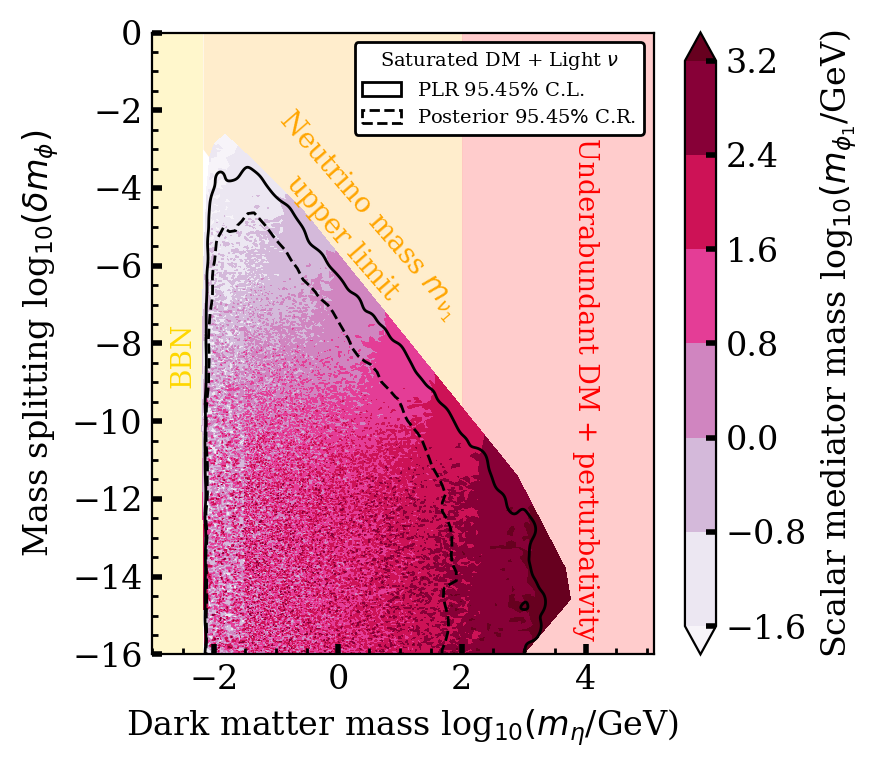

In [43]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([-2.18,2],0,[-3,-12],color='orange',alpha=0.2, lw=0)
ax.fill_between([-3.5,-2.18],-16,2,color='gold',alpha=0.2, lw=0)
ax.fill_between([2,5.2],-16,2,color='red',alpha=0.2, lw=0)

corner.hist2d(dm_mass_sat_l, delmphi_sat_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['black'], 'linestyles':'--'}, bins=60, smooth=True)

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,30), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

plt.tricontourf(dm_mass_sat_l, delmphi_sat_l, mphi_sat_l, cmap='PuRd', extend='both')
plt.colorbar().set_label(r'Scalar mediator mass log$_{10}(m_{\phi_1}$/GeV)')

ax.annotate(r'BBN',(-2.5,-9),ha='center', rotation=90, fontsize=10, color='gold')
ax.annotate(r'Neutrino mass $m_{\nu_1}$'+'\n'+'upper limit',(0.3,-7.9),ha='center', rotation=-49, fontsize=10, color='orange')
ax.annotate(r'Underabundant DM + perturbativity',(4,-15.5),ha='center',rotation=-90,fontsize=9.7,color='red')

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Dark matter mass '+all_labels[0])
ax.set_ylabel(r'Mass splitting '+all_labels[2])
ax.set_facecolor('white')


fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='upper right', 
                  framealpha=1, edgecolor='black',title=r'Saturated DM + Light $\nu$', title_fontsize=7)

# plt.ylim(-16,extent4[3])
plt.xlim(-3,5.1)#extent4[1])
plt.ylim(-16,0)
plt.tight_layout()
            
#plt.savefig('dm_mass_delmphi_pos_vs_plr_light_saturated_mass_splitting_tricontour.pdf')
plt.show()  

In [44]:
xp = dm_mass_und_l
yp = delmphi_und_l

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_und_l,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_und_l))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

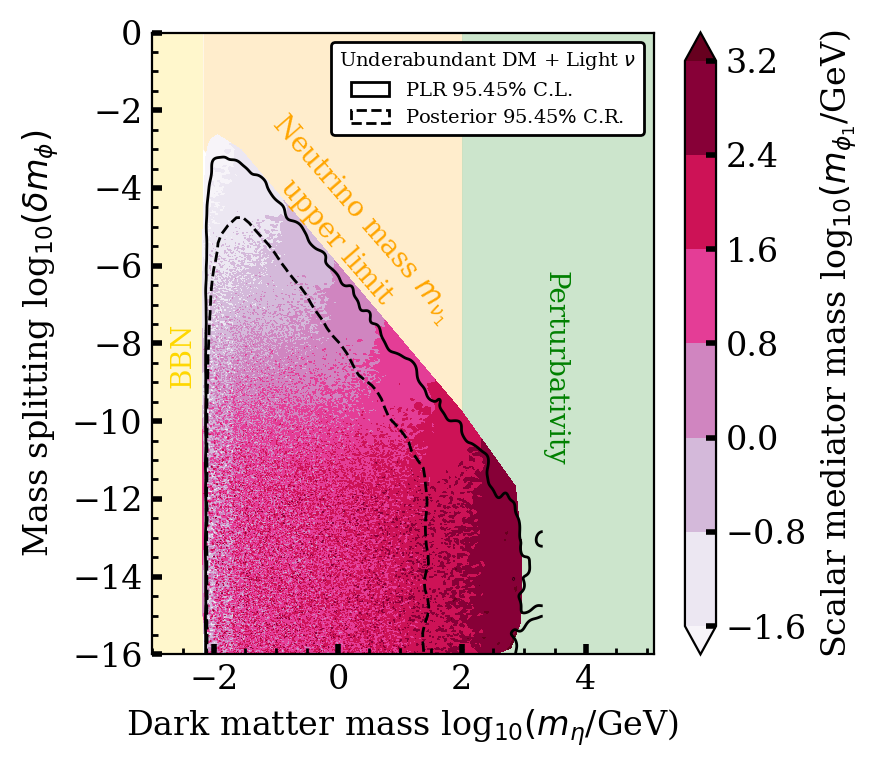

In [45]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([-2.18,2],0,[-3,-12],color='orange',alpha=0.2, lw=0)
#ax.fill_between([-2.18,1], -16, 2, color='red', alpha=0.2, lw=0)  # Red on the left of orange
#ax.fill_between([0.5,3.15], [-12,-12], [-6.8,-12], color='red', alpha=0.2, lw=0)  # Red below the orange slope
#ax.fill_between([-2.18,5.3],-16,-12,color='green',alpha=0.2, lw=0)
ax.fill_between([-3.5,-2.18],-16,2,color='gold',alpha=0.2, lw=0)
ax.fill_between([2,5.2],-16,2,color='green',alpha=0.2, lw=0)

corner.hist2d(dm_mass_und_l, delmphi_und_l, ax=ax, levels=[0.9545], plot_density=False, plot_datapoints=False,
              fill_contours=True,plot_contours=True,
              contourf_kwargs={'colors':['none','white','white']},
              contour_kwargs={'linewidths': 1, 'colors': ['black'],'linestyles':'--'}, bins=60, smooth=True)

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,21), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

# **Refine triangulation** by masking invalid regions
# Threshold the data to exclude points where likelihood is very low
valid_mask = (dm_mass_und_l > -2.2) & (dm_mass_und_l < 3)
#mphi_sat > np.percentile(mphi_sat, 5)  # Example: filter the lowest 5% likelihood values

# Triangulate the filtered data
triang = matplotlib.tri.Triangulation(dm_mass_und_l[valid_mask], delmphi_und_l[valid_mask])

# Plot the triangulation
plt.tricontourf(triang, mphi_und_l[valid_mask], cmap='PuRd', extend='both')
plt.colorbar().set_label(r'Scalar mediator mass log$_{10}(m_{\phi_1}$/GeV)')

fmt_labels=[r'Posterior 95.45$\%$ C.R.',r'Saturated + Light',r'Underabundant + Heavy',r'Saturated + Heavy']
manual=[[2,0]] #label position
ax.annotate(r'BBN',(-2.5,-9),ha='center', rotation=90, fontsize=10, color='gold')
ax.annotate(r'Neutrino mass $m_{\nu_1}$'+'\n'+'upper limit',(0.2,-8),ha='center', rotation=-49, fontsize=10, color='orange')
ax.annotate(r'Perturbativity',(3.5,-11),ha='center',rotation=-90,fontsize=10,color='green')


ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel(r'Dark matter mass '+all_labels[0])
ax.set_ylabel(r'Mass splitting '+all_labels[2])
ax.set_facecolor('white')


fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='upper right', 
                  framealpha=1, edgecolor='black',title=r'Underabundant DM + Light $\nu$', title_fontsize=7)


# plt.ylim(-16,extent4[3])
plt.xlim(-3,5.1)#extent4[1])
plt.ylim(-16,0)
plt.tight_layout()
            
#plt.savefig('dm_mass_delmphi_pos_vs_plr_light_underabundant_mass_splitting_tricontour.pdf')
plt.show()  

In [46]:
xp = np.log10(10**mn_sat+10**mphi_sat)
yp = lamphi_sat+2*ynu_sat

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_sat,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_sat))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

/tmp/ipykernel_190977/1941807658.py:45: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cst.collections:


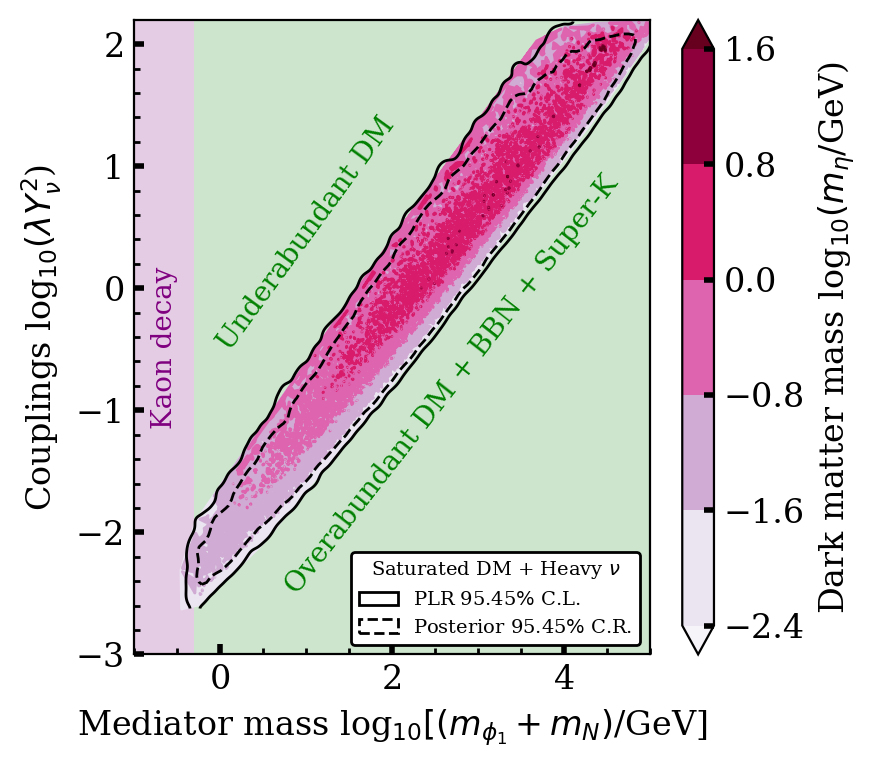

In [47]:
fig, ax = plt.subplots(figsize=(4.5,4))

ax.fill_between([np.log10(mk),5],-4,3,color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
#ax.fill_between([np.log10(mk),np.log10(60)],-1,couplings_limit,color='teal',alpha=0.2, linewidth=0)

corner.hist2d(np.log10(10**mn_sat+10**mphi_sat),lamphi_sat+2*ynu_sat,ax=ax,levels=[0.9545],color='pink',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=100, smooth=True) 
ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,20), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

cst=plt.tricontourf(np.log10(10**mn_sat+10**mphi_sat),lamphi_sat+2*ynu_sat,dm_mass_sat,
                cmap='PuRd', extend='both')#,norm=matplotlib.colors.LogNorm())
plt.colorbar(cst).set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')

ax.annotate(r'Underabundant DM' ,(1,-0.5),ha='center', rotation=54, fontsize=10, color='green')
ax.annotate(r'Overabundant DM + BBN + Super-K' ,(2.7,-2.5),ha='center', rotation=52, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
#ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_facecolor('white')


fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='lower right', 
                  framealpha=1, edgecolor='black',title=r'Saturated DM + Heavy $\nu$', title_fontsize=7)

plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)

for c in cst.collections:
    c.set_edgecolor("face")
    
plt.tight_layout()

#plt.savefig('masses_couplings_pos_vs_plr_heavy_saturated_dm_mass_tricontour.pdf', transparent=False)

plt.show()

In [48]:
import matplotlib.patches as patches

In [49]:
xp = np.log10(10**mn_und_l+10**mphi_und_l)
yp = lamphi_und_l+2*ynu_und_l

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_und_l,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_und_l))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

**The next plots are also done with scattering to compare to tricontourf, for the paper we post-edit the plots done with tricontourf**

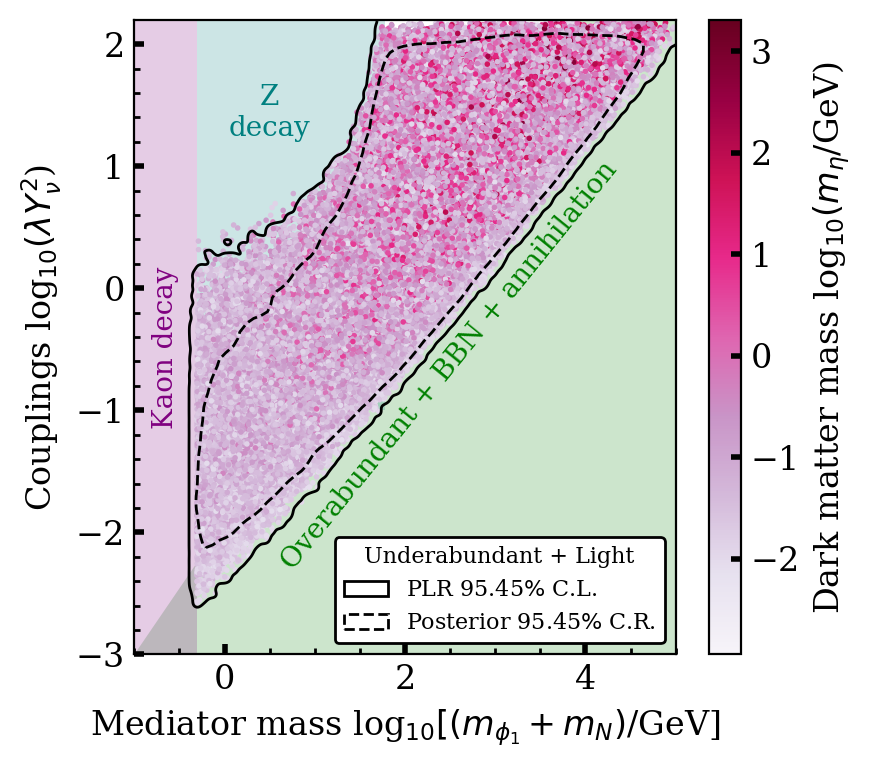

In [53]:
fig, ax = plt.subplots(figsize=(4.5,4))

# Define the coordinates of the triangle
triangle_coords = [(2, couplings_limit), (2, -0.5), (4.9, couplings_limit)]

# Create the triangle patch
triangle = patches.Polygon(triangle_coords, closed=True, color='white', lw=0, zorder=2)

# Coordinates of the triangle's corners
x1, y1 = 5, -3  # Bottom-right corner (right angle)
x2, y2 = 5, 3.5  # Top-left corner
x3, y3 = -1, -3  # Bottom-left corner

x_values = [x1, x2, x3, x1]  # We close the triangle by repeating the first point
y_values = [y1, y2, y3, y1]

# Fill the triangle area using fill_between
ax.fill(x_values, y_values, color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
ax.fill_between([np.log10(mk),np.log10(60)],-1,couplings_limit,color='teal',alpha=0.2, linewidth=0)

# Add the triangle to the axes
#ax.add_patch(triangle)

corner.hist2d(np.log10(10**mn_und_l+10**mphi_und_l),lamphi_und_l+2*ynu_und_l,ax=ax,levels=[0.9545],color='white',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=100, smooth=True)#, zorder=3) 


ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,10), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

plt.scatter(np.log10(10**mn_und_l+10**mphi_und_l),lamphi_und_l+2*ynu_und_l,c=dm_mass_und_l,s=1,cmap='PuRd')#,zorder=3)#,norm=matplotlib.colors.LogNorm())
plt.colorbar().set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')


ax.annotate(r'Overabundant + BBN + annihilation' ,(2.5,-2.3),ha='center', rotation=51, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=8, loc='lower right', 
                  framealpha=1, edgecolor='black',title='Underabundant + Light', title_fontsize=8)


plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)
plt.tight_layout()

#plt.savefig('masses_couplings_pos_2sigma_light_underabundant_mass_splitting.pdf')

plt.show()

/tmp/ipykernel_190977/779902221.py:77: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cst.collections:


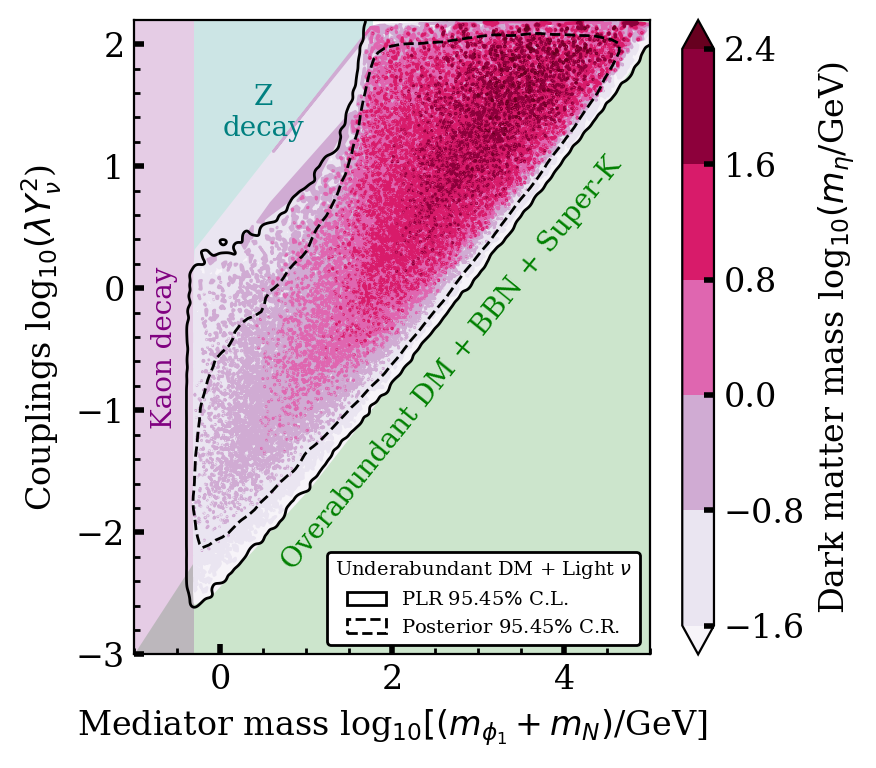

In [52]:
fig, ax = plt.subplots(figsize=(4.5,4))

# Define the coordinates of the triangle
triangle_coords = [(2, couplings_limit), (2, -0.5), (4.9, couplings_limit)]

# Create the triangle patch
triangle = patches.Polygon(triangle_coords, closed=True, color='white', lw=0, zorder=2)

# Coordinates of the triangle's corners
x1, y1 = 5, -3  # Bottom-right corner (right angle)
x2, y2 = 5, 3.5  # Top-left corner
x3, y3 = -1, -3  # Bottom-left corner

x_values = [x1, x2, x3, x1]  # We close the triangle by repeating the first point
y_values = [y1, y2, y3, y1]

# Fill the triangle area using fill_between
ax.fill(x_values, y_values, color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
ax.fill_between([np.log10(mk),np.log10(60)],-1,couplings_limit,color='teal',alpha=0.2, linewidth=0)

# Add the triangle to the axes
#ax.add_patch(triangle)

corner.hist2d(np.log10(10**mn_und_l+10**mphi_und_l),lamphi_und_l+2*ynu_und_l,ax=ax,levels=[0.9545],color='white',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=100, smooth=True)#, zorder=3) 


# **Refine triangulation** by masking invalid regions
# Threshold the data to exclude points where likelihood is very low
valid_mask = (dm_mass_und_l > -2.2) & (dm_mass_und_l < 3) & (Z_decay_und_l < 0.0023)
#mphi_sat > np.percentile(mphi_sat, 5)  # Example: filter the lowest 5% likelihood values

# Triangulate the filtered data
triang = matplotlib.tri.Triangulation(np.log10(10**mn_und_l[valid_mask]+10**mphi_und_l[valid_mask]), lamphi_und_l[valid_mask]+2*ynu_und_l[valid_mask])

#refiner = matplotlib.tri.UniformTriRefiner(triang)
#tri_refi, z_test_refi = refiner.refine_field(delmphi_und_l[valid_mask], subdiv=0)

# Plot the triangulation
#plt.tricontourf(tri_refi, z_test_refi, cmap='PuRd')
cst = ax.tricontourf(triang, dm_mass_und_l[valid_mask], cmap='PuRd', extend='both',alpha=1)
#plt.tricontourf(np.log10(10**mn_und_l+10**mphi_und_l),lamphi_und_l+2*ynu_und_l,delmphi_und_l,cmap='PuRd')#,zorder=3)#,norm=matplotlib.colors.LogNorm())
plt.colorbar(cst).set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,10), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

ax.annotate(r'Overabundant DM + BBN + Super-K' ,(2.7,-2.3),ha='center', rotation=51, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']
            
blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='lower right', 
                  framealpha=1, edgecolor='black',title=r'Underabundant DM + Light $\nu$', title_fontsize=7)


plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)

for c in cst.collections:
    c.set_edgecolor("face")
    
plt.tight_layout()

#plt.savefig('masses_couplings_pos_vs_plr_light_underabundant_dm_mass_tricontour.pdf',transparent=False)

plt.show()

In [54]:
xp = np.log10(10**mn_und+10**mphi_und)
yp = lamphi_und+2*ynu_und

bin_max_tot, bin_xedges1, bin_yedges1, binnumber1= scipy.stats.binned_statistic_2d(xp,yp,total_like_und,statistic='max',bins=200) #100
PLR2 = np.exp(bin_max_tot.T)/np.exp(np.max(total_like_und))
PLR2[np.isnan(PLR2)]=0 #sending unallowed parameters to 0
            
extent = [np.min(xp),np.max(xp),np.min(yp),np.max(yp)]
            
x = np.linspace(extent[0],extent[1],200)#50
y = np.linspace(extent[2],extent[3],200) #50
oldcoords = np.array([[a,b] for a in x for b in y])
            
interpolator_bi = scipy.interpolate.RectBivariateSpline(x,y,PLR2, ky=1, kx=1)
            
xnew = np.linspace(extent[0],extent[1],2000) #300
ynew = np.linspace(extent[2],extent[3],2000) #300
newcoords = np.array([[a,b] for a in xnew for b in ynew])
            
PLR_interpolated = interpolator_bi(xnew,ynew)

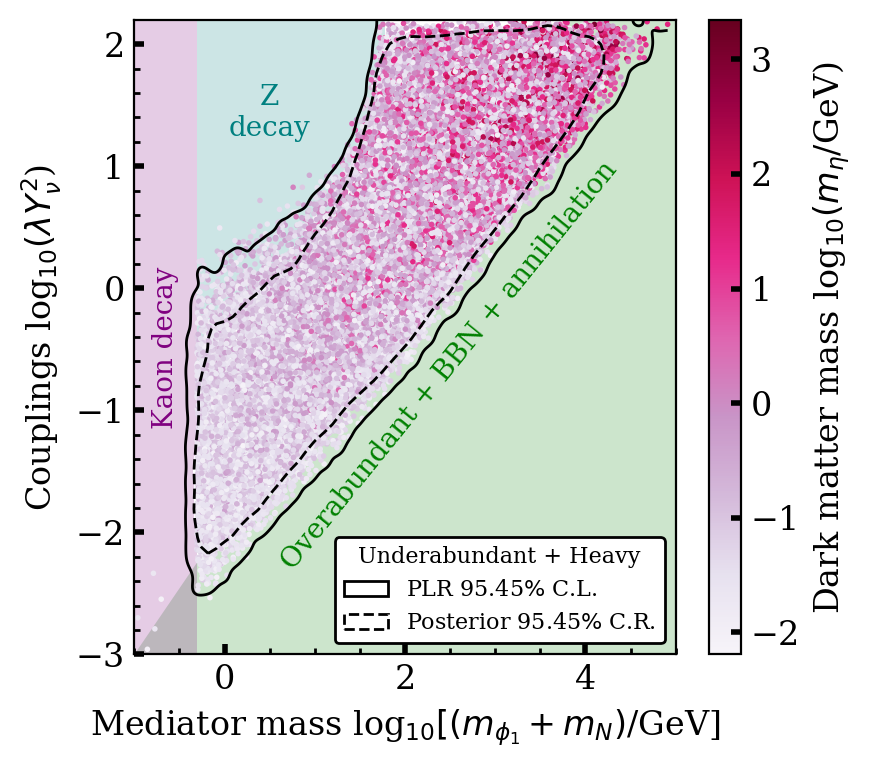

In [58]:
fig, ax = plt.subplots(figsize=(4.5,4))

# Define the coordinates of the triangle
triangle_coords = [(2, couplings_limit), (2, -0.5), (4.9, couplings_limit)]

# Create the triangle patch
triangle = patches.Polygon(triangle_coords, closed=True, color='white', lw=0, zorder=2)

# Coordinates of the triangle's corners
x1, y1 = 5, -3  # Bottom-right corner (right angle)
x2, y2 = 5, 3.5  # Top-left corner
x3, y3 = -1, -3  # Bottom-left corner

x_values = [x1, x2, x3, x1]  # We close the triangle by repeating the first point
y_values = [y1, y2, y3, y1]

# Fill the triangle area using fill_between
ax.fill(x_values, y_values, color='green',alpha=0.2, linewidth=0)

# ax.fill_between(np.linspace(-1.2,2),np.log10(slope_2),np.log10(slope_2)+np.linspace(0,np.log10(np.sqrt(4*np.pi))+3),
#                  color='green',alpha=0.2, linewidth=0)
#ax.fill_between([2.006,5],-4,2,color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
ax.fill_between([np.log10(mk),np.log10(60)],-0.8,couplings_limit,color='teal',alpha=0.2, linewidth=0)

# Add the triangle to the axes
#ax.add_patch(triangle)

corner.hist2d(np.log10(10**mn_und+10**mphi_und),lamphi_und+2*ynu_und,ax=ax,levels=[0.9545],color='white',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=70, smooth=True)#, zorder=3) 

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,20), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)

plt.scatter(np.log10(10**mn_und+10**mphi_und),lamphi_und+2*ynu_und,c=dm_mass_und,s=1,cmap='PuRd')#,zorder=3)#,norm=matplotlib.colors.LogNorm())
plt.colorbar().set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')

ax.annotate(r'Overabundant + BBN + annihilation' ,(2.5,-2.3),ha='center', rotation=51, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']

blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])
#mlines.Line2D([], [], color='black', marker='_',
                          #markersize=15, label=fmt_labels[0])

legend=plt.legend(handles=[black_line,blue_line],frameon=True, fontsize=8, loc='lower right', 
                  framealpha=1, edgecolor='black', title='Underabundant + Heavy',title_fontsize=8)

plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)
plt.tight_layout()

#plt.savefig('masses_couplings_pos_vs_plr_heavy_underabundant_mass_splitting.pdf')

plt.show()

/tmp/ipykernel_190977/2120399238.py:77: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cst.collections:


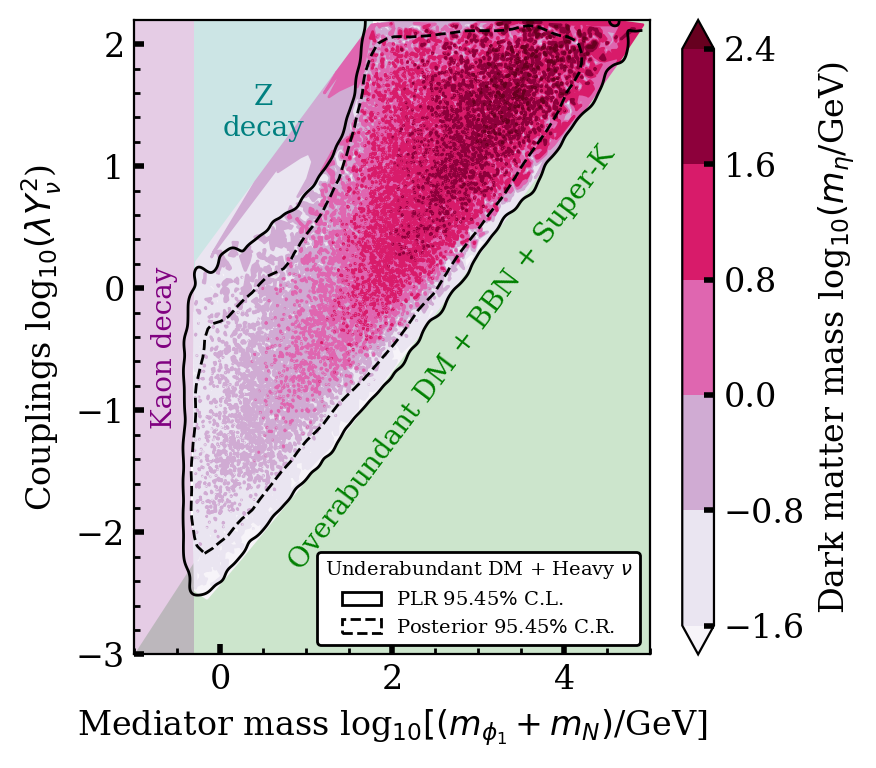

In [56]:
fig, ax = plt.subplots(figsize=(4.5,4))

# Define the coordinates of the triangle
triangle_coords = [(2, couplings_limit), (2, -0.5), (4.9, couplings_limit)]

# Create the triangle patch
triangle = patches.Polygon(triangle_coords, closed=True, color='white', lw=0, zorder=2)

# Coordinates of the triangle's corners
x1, y1 = 5, -3  # Bottom-right corner (right angle)
x2, y2 = 5, 3.5  # Top-left corner
x3, y3 = -1, -3  # Bottom-left corner

x_values = [x1, x2, x3, x1]  # We close the triangle by repeating the first point
y_values = [y1, y2, y3, y1]

# Fill the triangle area using fill_between
ax.fill(x_values, y_values, color='green',alpha=0.2, linewidth=0)

# ax.fill_between(np.linspace(-1.2,2),np.log10(slope_2),np.log10(slope_2)+np.linspace(0,np.log10(np.sqrt(4*np.pi))+3),
#                  color='green',alpha=0.2, linewidth=0)
#ax.fill_between([2.006,5],-4,2,color='green',alpha=0.2, linewidth=0)
ax.fill_between([-3.5,np.log10(mk)],-5,couplings_limit,color='purple',alpha=0.2, linewidth=0)
ax.fill_between([np.log10(mk),np.log10(60)],-0.8,couplings_limit,color='teal',alpha=0.2, linewidth=0)

# Add the triangle to the axes
#ax.add_patch(triangle)

corner.hist2d(np.log10(10**mn_und+10**mphi_und),lamphi_und+2*ynu_und,ax=ax,levels=[0.9545],color='white',plot_density=False, plot_datapoints=False,
                  contour_kwargs={'linewidths':1, 'colors':'black','linestyles':'--'}, bins=70, smooth=True)#, zorder=3) 

ax.contour(scipy.ndimage.gaussian_filter(PLR_interpolated,20), extent=extent, levels=[contour_levels[0],1], colors='black',linewidths=1)
# **Refine triangulation** by masking invalid regions
# Threshold the data to exclude points where likelihood is very low
valid_mask = (dm_mass_und > -2.2) & (dm_mass_und < 3) & (Z_decay_und < 0.0023) & (np.log10(10**mn_und+10**mphi_und)>-0.5)
#mphi_sat > np.percentile(mphi_sat, 5)  # Example: filter the lowest 5% likelihood values

# Triangulate the filtered data
triang = matplotlib.tri.Triangulation(np.log10(10**mn_und[valid_mask]+10**mphi_und[valid_mask]), lamphi_und[valid_mask]+2*ynu_und[valid_mask])

# Plot the triangulation
#plt.tricontourf(tri_refi, z_test_refi, cmap='PuRd')
cst=plt.tricontourf(triang, dm_mass_und[valid_mask], cmap='PuRd',extend='both')

plt.colorbar(cst).set_label(r'Dark matter mass log$_{10}(m_\eta$/GeV)')

ax.annotate(r'Overabundant DM + BBN + Super-K' ,(2.7,-2.3),ha='center', rotation=53, fontsize=10, color='green')
ax.annotate(r'Kaon decay',(-0.65,-1.1),ha='center', rotation=90, fontsize=10, color='purple')
ax.annotate(r'Z'+'\n'+'decay',(0.5,1.25),ha='center', rotation=0, fontsize=10, color='teal')

ax.set_xlabel(r'Mediator mass log$_{10} [(m_{\phi_1}+m_N)$/GeV]')
ax.set_ylabel(r'Couplings '+all_labels[6])

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_facecolor('white')

fmt_labels=[r'Posterior 95.45$\%$ C.R.', r'PLR 95.45$\%$ C.L.']

blue_line = mpatches.Patch(edgecolor="black",facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[0], linestyle='--')
black_line = mpatches.Patch(edgecolor='black',facecolor='white',alpha=1,hatch=None,
                          label=fmt_labels[1])
#mlines.Line2D([], [], color='black', marker='_',
                          #markersize=15, label=fmt_labels[0])

legend=plt.legend(handles=[black_line, blue_line],frameon=True, fontsize=7, loc='lower right', 
                  framealpha=1, edgecolor='black', title=r'Underabundant DM + Heavy $\nu$',title_fontsize=7)

plt.xlim(-1,5)
plt.ylim(-3,couplings_limit)

for c in cst.collections:
    c.set_edgecolor("face")
    
plt.tight_layout()

#plt.savefig('masses_couplings_pos_vs_plr_heavy_underabundant_dm_mass_tricontour.pdf', transparent=False)

plt.show()

**Plot for the bound from Super-K**

In [60]:
df_swave = pd.read_csv('SK-ve-limits.csv',skiprows=0,names=['mx','sigmav'])
df_swave['log10(mx)'] = np.log10(df_swave['mx'])

#creating arrays for interpolation
swave_mx = df_swave['log10(mx)'].to_numpy()
swave_sigmav = df_swave['sigmav'].to_numpy()

#interpolation for chi^2
swave_sigmav_int = scipy.interpolate.interp1d(swave_mx,swave_sigmav,kind='linear')

df_realdm = pd.read_table('S_1.dat', skiprows=0,sep=' ',names=['mass', 'sv', 'omega_error', 'dof_error'])
df_realdm

,mass,sv,omega_error,dof_error
0,0.001000,4.76812,0.04400,0.00282
1,0.001030,4.76217,0.04403,0.00282
2,0.001061,4.75460,0.04406,0.00281
3,0.001093,4.74539,0.04407,0.00281
4,0.001126,4.73452,0.04406,0.00281
...,...,...,...,...
625,105503.000000,2.29375,0.01985,0.01568
626,108668.000000,2.29613,0.01987,0.01558
627,111928.000000,2.29851,0.01988,0.01547
628,115286.000000,2.30089,0.01990,0.01537


In [61]:
mx_log = np.log10(np.logspace(np.min(df_swave['log10(mx)']), np.max(df_swave['log10(mx)'])))
sigmav_int = swave_sigmav_int(mx_log)

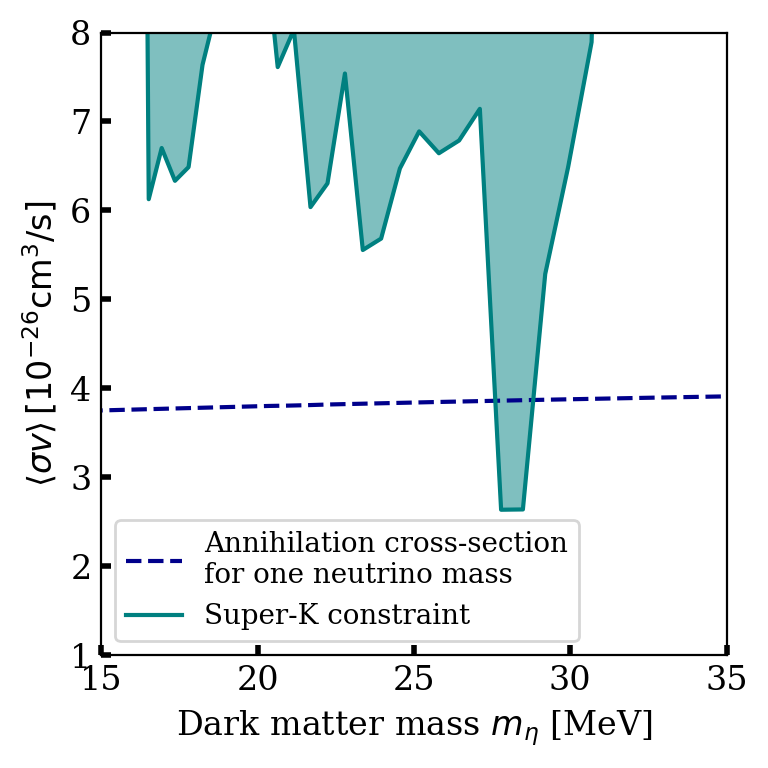

In [62]:
fig = plt.figure(figsize=(4,4))
plt.plot(df_realdm['mass']*1e3, df_realdm['sv'],c='darkblue', ls='--',label='Annihilation cross-section'+'\n'+'for one neutrino mass')
plt.plot((10**mx_log)*1e3,sigmav_int*1e26, c='teal',label=r'Super-K constraint')
plt.fill_between((10**mx_log)*1e3,sigmav_int*1e26,8,alpha=0.5,color='teal')
plt.xlabel(r'Dark matter mass $m_\eta$ [MeV]')
plt.ylabel(r'$\langle \sigma v \rangle \, [10^{-26} \mathrm{cm}^3/\mathrm{s}]$')

plt.ylim(1,8)
plt.xlim(15,35)

plt.legend(loc='best',fontsize=10)
plt.tight_layout()
#plt.savefig('sigmav_vs_mdm_sk.pdf')#, dpi=240)
plt.show()